In [56]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.datasets import mnist, fashion_mnist, cifar10, cifar100
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import pickle
import tensorflow as tf
import math as m
from keras_preprocessing import image
import os
import pickle
from tensorflow.keras.models import load_model
from numpy import unique, argmax

In [78]:
# Load Data 
with open('data_faces.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)

# Reshape Data
# x_pre_1 = x_train[1]
# x_pre_2 = x_train[300]
# x_pre_3 = x_train[200]


# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

In [84]:
classes = ['anger','happiness','sadness','surpise ']
print("Image Processing.......Compleated")
cnn = tf.keras.models.Sequential()
print("Building Neural Network.....")
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224,1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print("Training cnn")
cnn.fit(x_train, y_train, epochs = 50, batch_size = 64, validation_split = 0.2)
cnn.save("model.h5")

Image Processing.......Compleated
Building Neural Network.....
Training cnn
Epoch 1/50
5/5 [==============================] - 1s 116ms/step - loss: 1.4285 - accuracy: 0.2475 - val_loss: 1.3618 - val_accuracy: 0.3784
Epoch 2/50
5/5 [==============================] - 0s 70ms/step - loss: 1.3886 - accuracy: 0.2712 - val_loss: 1.3661 - val_accuracy: 0.3108
Epoch 3/50
5/5 [==============================] - 0s 76ms/step - loss: 1.3820 - accuracy: 0.2746 - val_loss: 1.3704 - val_accuracy: 0.3108
Epoch 4/50
5/5 [==============================] - 0s 70ms/step - loss: 1.3805 - accuracy: 0.2746 - val_loss: 1.3636 - val_accuracy: 0.3108
Epoch 5/50
5/5 [==============================] - 0s 77ms/step - loss: 1.3734 - accuracy: 0.2847 - val_loss: 1.3523 - val_accuracy: 0.3108
Epoch 6/50
5/5 [==============================] - 0s 70ms/step - loss: 1.3548 - accuracy: 0.2915 - val_loss: 1.3072 - val_accuracy: 0.3514
Epoch 7/50
5/5 [==============================] - 0s 68ms/step - loss: 1.2953 - accuracy:

In [85]:
classes = ['anger','happiness','sadness','surpise ']
new_model = load_model('/content/model.h5')

Text(0.5, 1.0, 'Model dự đoán là: anger')

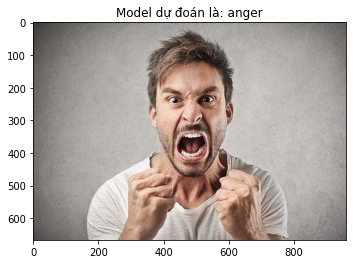

In [86]:
filename = "/content/1.jpg"
plt.imshow(cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))
img = cv2.resize(cv2.imread(filename,0), (224,224))
plt.title("Model dự đoán là: " + classes[np.argmax(new_model.predict(img.reshape(1,224,224)))])

Text(0.5, 1.0, 'Model dự đoán là: anger')

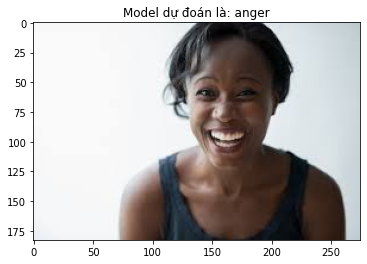

In [87]:
filename = "/content/2.jpg"
plt.imshow(cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))
img = cv2.resize(cv2.imread(filename,0), (224,224))
plt.title("Model dự đoán là: " + classes[np.argmax(new_model.predict(img.reshape(1,224,224)))])

Text(0.5, 1.0, 'Model dự đoán là: anger')

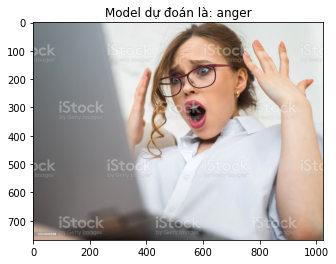

In [88]:
filename = "/content/3.jpg"
plt.imshow(cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))
img = cv2.resize(cv2.imread(filename,0), (224,224))
plt.title("Model dự đoán là: " + classes[np.argmax(new_model.predict(img.reshape(1,224,224)))])